<a href="https://colab.research.google.com/github/DGallach/Electromagnetism/blob/main/Campo%20de%20un%20dipolo%20el%C3%A9ctrico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

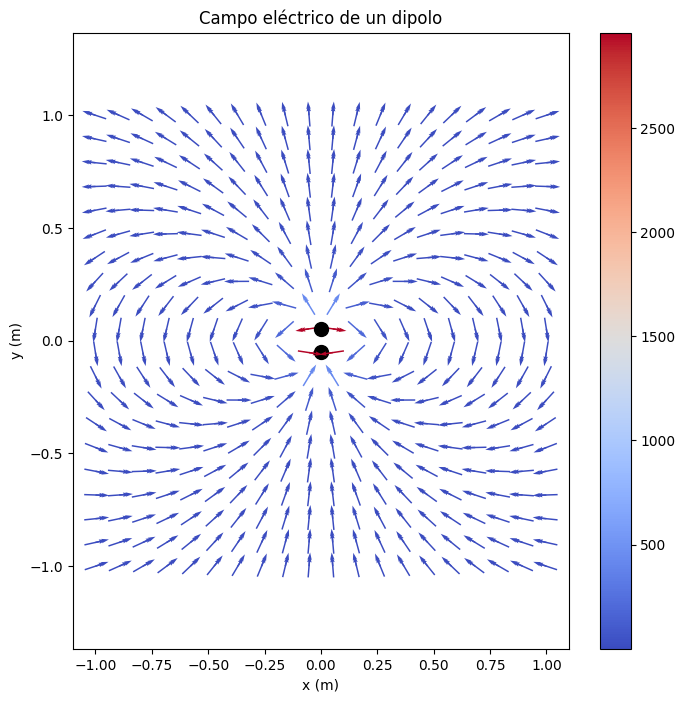

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Constante de Coulomb
k = 8.9875517873681764e9  # N m^2/C^2

def electric_field_dipole(p, r, r_plus, r_minus):
    """
    Calcula el campo eléctrico en el punto r debido a un dipolo.

    Parámetros:
    p -- Momento dipolar (C*m)
    r -- Posición donde se calcula el campo (m)
    r_plus -- Posición de la carga positiva (m)
    r_minus -- Posición de la carga negativa (m)

    Retorna:
    E -- Campo eléctrico en la posición r (N/C)
    """
    r_plus_vec = r - r_plus
    r_minus_vec = r - r_minus

    r_plus_mag = np.linalg.norm(r_plus_vec)
    r_minus_mag = np.linalg.norm(r_minus_vec)

    E_plus = k * p / r_plus_mag**3 * r_plus_vec
    E_minus = -k * p / r_minus_mag**3 * r_minus_vec

    E = E_plus + E_minus
    return E

def plot_electric_field(p, d, grid_size, resolution):
    """
    Grafica el campo eléctrico de un dipolo en un plano 2D.

    Parámetros:
    p -- Momento dipolar (C*m)
    d -- Separación entre las cargas del dipolo (m)
    grid_size -- Tamaño de la cuadrícula (m)
    resolución -- Resolución de la cuadrícula (número de puntos por eje)
    """
    # Posiciones de las cargas
    r_plus = np.array([0, d/2])
    r_minus = np.array([0, -d/2])

    # Crear la cuadrícula de puntos
    x = np.linspace(-grid_size, grid_size, resolution)
    y = np.linspace(-grid_size, grid_size, resolution)
    X, Y = np.meshgrid(x, y)

    # Inicializar componentes del campo eléctrico
    Ex = np.zeros((resolution, resolution))
    Ey = np.zeros((resolution, resolution))
    E_magnitude = np.zeros((resolution, resolution))

    # Calcular el campo eléctrico en cada punto de la cuadrícula
    for i in range(resolution):
        for j in range(resolution):
            r = np.array([X[i, j], Y[i, j]])
            E = electric_field_dipole(p, r, r_plus, r_minus)
            Ex[i, j] = E[0]
            Ey[i, j] = E[1]
            E_magnitude[i, j] = np.linalg.norm(E)

    # Normalizar el campo eléctrico para que todas las flechas tengan la misma longitud
    Ex_normalized = Ex / E_magnitude
    Ey_normalized = Ey / E_magnitude

    # Crear el gráfico
    fig, ax = plt.subplots(figsize=(8, 8))
    magnitude = np.sqrt(Ex**2 + Ey**2)
    ax.quiver(X, Y, Ex_normalized, Ey_normalized, magnitude, cmap='coolwarm', pivot='middle', angles='xy', scale_units='xy', scale=10)
    ax.scatter([r_plus[0], r_minus[0]], [r_plus[1], r_minus[1]], color='black', s=100)
    ax.set_xlabel('x (m)')
    ax.set_ylabel('y (m)')
    ax.set_title('Campo eléctrico de un dipolo')
    ax.axis('equal')
    plt.colorbar(ax.quiver(X, Y, Ex_normalized, Ey_normalized, magnitude, cmap='coolwarm'))
    plt.show()

# Parámetros del dipolo
p = 1e-9  # Momento dipolar en C*m
d = 0.1   # Separación entre las cargas en m
grid_size = 1.0  # Tamaño de la cuadrícula en m
resolution = 20  # Resolución de la cuadrícula

# Graficar el campo eléctrico del dipolo
plot_electric_field(p, d, grid_size, resolution)

